### **1. Import Library**

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error

### **2. Import Data Hasil Rules**

In [83]:
df = pd.read_csv('data/rules2024.csv')
df

,Unnamed: 0,antecedents,consequents,support,confidence,lift
0,0,"frozenset({'SAKINAH 1500ML', 'GREENFIELDS COKL...",frozenset({'GREENFIELDS STRAW 105ML'}),0.000109,1,4922.846154
1,1,"frozenset({'BISKUAT BOLU CKL 16GR', 'INDOMILK ...","frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",0.000141,1,2206.793103
2,2,"frozenset({'GATSBY SPL/C GS 175ML', 'FRESHCARE...",frozenset({'GATSBY SPL/C DO 175ML'}),0.000141,1,1185.129630
3,3,"frozenset({'KISPRAY POUCH GLAM/GLD 300ML', 'IN...",frozenset({'SOKLIN LIQ LAVENDER 625ML'}),0.000109,1,831.129870
4,4,"frozenset({'SEDAAP MIE CUP BASO BLEDUK', 'SEDA...",frozenset({'SEDAAP MIE CUP SOTO'}),0.000125,1,780.451220
5,5,"frozenset({'SEDAAP MIE CUP AYM JERIT /12', 'SE...",frozenset({'SEDAAP MIE CUP SOTO'}),0.000109,1,780.451220
6,6,"frozenset({'ATTACK JAZ 1 CINTA 1 6 KG', 'NUVO ...",frozenset({'NUVO SOAP BLUE 72G'}),0.000109,1,484.825758
7,7,"frozenset({'BISKUAT BOLU CKL 16GR', 'INDOMILK ...",frozenset({'CLOUD 9 VANILA 15 4G'}),0.000141,1,378.680473
8,8,"frozenset({'BISKUAT BOLU CKL 16GR', 'INDOMILK ...",frozenset({'CLOUD 9 VANILA 15 4G'}),0.000141,1,378.680473
9,9,"frozenset({'DELFI TOP TRIP/CHO 9GR', 'MOMOGI J...",frozenset({'DELFI TOP B/WHITE 9GR'}),0.000109,1,353.574586


### **3. Ambil Top 3 Rules dengan Akurasi Tinggi**

In [84]:
df = df.head(3)
df

,Unnamed: 0,antecedents,consequents,support,confidence,lift
0,0,"frozenset({'SAKINAH 1500ML', 'GREENFIELDS COKL...",frozenset({'GREENFIELDS STRAW 105ML'}),0.000109,1,4922.846154
1,1,"frozenset({'BISKUAT BOLU CKL 16GR', 'INDOMILK ...","frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",0.000141,1,2206.793103
2,2,"frozenset({'GATSBY SPL/C GS 175ML', 'FRESHCARE...",frozenset({'GATSBY SPL/C DO 175ML'}),0.000141,1,1185.129630


### **4. Ambil Item dari Top 3**

In [85]:
# Jika df berasal dari subset sebelumnya, tambahkan .copy()
df = df.copy()

# Pastikan semua elemen dalam kolom antecedents dan consequents adalah frozenset
df["antecedents"] = df["antecedents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)
df["consequents"] = df["consequents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)

# Mengambil semua item unik
all_items = set()
for col in ["antecedents", "consequents"]:
    for items in df[col]:
        all_items.update(items)

all_items

{'BISKUAT BOLU CKL 16GR',
 'CLOUD 9 CHOCO 15 4G',
 'CLOUD 9 VANILA 15 4G',
 'FRESHCARE ORIGINAL 10ML',
 'GATSBY SPL/C DO 175ML',
 'GATSBY SPL/C GS 175ML',
 'GREENFIELDS COKLAT 105ML',
 'GREENFIELDS STRAW 105ML',
 'INDOMILK KID CKL 115ML',
 'INDOMILK KID VNL 115ML',
 'SAKINAH 1500ML'}

### **5. Import Data Transaksi**

In [86]:
groceries = pd.read_excel('data/final_data2024.xlsx')
groceries

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
0,2024-01-01,2401011010001,GULA ROSE BRAND 1KG,1
1,2024-01-01,2401011010002,RIZKI MG 850ML/900ML BTL,3
2,2024-01-01,2401011010003,ULTRA MIMI VNL 125ML,1
3,2024-01-01,2401011010003,BEAR BRAND 189ML,1
4,2024-01-01,2401011010003,TINI WINI BITI ASIN 20 GR,1
...,...,...,...,...
167618,2024-12-31,2412311020122,WALLS POPULAIRE CKL,1
167619,2024-12-31,2412311020123,THERMAL 80X50 TRUST PAPER,1
167620,2024-12-31,2412311020124,SAKINAH 600ML,1
167621,2024-12-31,2412311020124,WALLS PP RAINBOW P,1


### **6. Filter Data Transaksi**

In [87]:
df_filtered = groceries[groceries['NAMA BARANG'].isin(all_items)]
df_filtered 

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
59,2024-01-01,2401011010018,INDOMILK KID VNL 115ML,1
1032,2024-01-02,2401021010091,BISKUAT BOLU CKL 16GR,2
1155,2024-01-03,2401031010006,INDOMILK KID VNL 115ML,3
1364,2024-01-03,2401031010077,SAKINAH 1500ML,1
2003,2024-01-04,2401041010044,SAKINAH 1500ML,1
...,...,...,...,...
167362,2024-12-31,2412311020034,INDOMILK KID CKL 115ML,1
167384,2024-12-31,2412311020038,INDOMILK KID CKL 115ML,1
167398,2024-12-31,2412311020042,SAKINAH 1500ML,1
167537,2024-12-31,2412311020090,INDOMILK KID CKL 115ML,1


In [88]:
# Menampilkan jumlah unik nama barang
jumlah_nama_barang = df_filtered['NAMA BARANG'].nunique()
print("Jumlah nama barang unik:", jumlah_nama_barang)

# Menampilkan isi nama barang yang unik
nama_barang_unik = df_filtered['NAMA BARANG'].unique()
print("Nama barang unik:")
for nama in nama_barang_unik:
    print("-", nama)

Jumlah nama barang unik: 11
Nama barang unik:
- INDOMILK KID VNL 115ML
- BISKUAT BOLU CKL 16GR
- SAKINAH 1500ML
- INDOMILK KID CKL 115ML
- GATSBY SPL/C DO 175ML
- GATSBY SPL/C GS 175ML
- FRESHCARE ORIGINAL 10ML
- CLOUD 9 VANILA 15 4G
- CLOUD 9 CHOCO 15 4G
- GREENFIELDS COKLAT 105ML
- GREENFIELDS STRAW 105ML


### **7. Agregasi Data Mingguan**

In [89]:
# Agregasi jumlah QTY per tanggal dan nama barang
df_grouped = df_filtered.groupby(['TANGGAL', 'NAMA BARANG'], as_index=False)['QTY'].sum()

tanggal_range = pd.date_range(start='2024-01-01', end='2024-12-31')
all_items = df_filtered['NAMA BARANG'].unique()

# Buat kombinasi semua tanggal dan item
multi_index = pd.MultiIndex.from_product([tanggal_range, all_items], names=['TANGGAL', 'NAMA BARANG'])
all_combinations = pd.DataFrame(index=multi_index).reset_index()

# Gabungkan dengan hasil groupby
df_joined = pd.merge(all_combinations, df_grouped, on=['TANGGAL', 'NAMA BARANG'], how='left')
df_joined['QTY'] = df_joined['QTY'].fillna(0)

# Pastikan TANGGAL dalam datetime
df_joined['TANGGAL'] = pd.to_datetime(df_joined['TANGGAL'])

# Urutkan dulu datanya
df_joined = df_joined.sort_values('TANGGAL')

# Ambil tanggal paling awal
start_date = df_joined['TANGGAL'].min()

# Hitung minggu ke-n secara manual (tiap 7 hari)
df_joined['WEEK_NUMBER'] = ((df_joined['TANGGAL'] - start_date).dt.days // 7) + 1

# Agregasi berdasarkan minggu dan nama barang
df_weekly = df_joined.groupby(['WEEK_NUMBER', 'NAMA BARANG'], as_index=False)['QTY'].sum()

# (Opsional) Tambahkan kolom tanggal mulai minggu
df_weekly['TANGGAL'] = start_date + pd.to_timedelta((df_weekly['WEEK_NUMBER'] - 1) * 7, unit='D')

# Visualisasi
fig = px.line(df_weekly, x='TANGGAL', y='QTY', color='NAMA BARANG',
              title='Jumlah Penjualan per Minggu (Setiap 7 Hari)')
fig.update_layout(legend_title_text='Klik untuk tampilkan/sembunyikan item')
fig.show()

In [90]:
df_weekly

,WEEK_NUMBER,NAMA BARANG,QTY,TANGGAL
0,1,BISKUAT BOLU CKL 16GR,5.0,2024-01-01
1,1,CLOUD 9 CHOCO 15 4G,3.0,2024-01-01
2,1,CLOUD 9 VANILA 15 4G,4.0,2024-01-01
3,1,FRESHCARE ORIGINAL 10ML,1.0,2024-01-01
4,1,GATSBY SPL/C DO 175ML,2.0,2024-01-01
...,...,...,...,...
578,53,GREENFIELDS COKLAT 105ML,0.0,2024-12-30
579,53,GREENFIELDS STRAW 105ML,0.0,2024-12-30
580,53,INDOMILK KID CKL 115ML,21.0,2024-12-30
581,53,INDOMILK KID VNL 115ML,6.0,2024-12-30


### **8. Pivot Data**

In [91]:
df_weekly = df_weekly.pivot(index='TANGGAL', columns='NAMA BARANG', values='QTY')
df_weekly.columns.name = None  # hilangkan nama kolom atas
df_weekly = df_weekly.reset_index() 
df_weekly.head()

,TANGGAL,BISKUAT BOLU CKL 16GR,CLOUD 9 CHOCO 15 4G,CLOUD 9 VANILA 15 4G,FRESHCARE ORIGINAL 10ML,GATSBY SPL/C DO 175ML,GATSBY SPL/C GS 175ML,GREENFIELDS COKLAT 105ML,GREENFIELDS STRAW 105ML,INDOMILK KID CKL 115ML,INDOMILK KID VNL 115ML,SAKINAH 1500ML
0,2024-01-01,5.0,3.0,4.0,1.0,2.0,1.0,0.0,0.0,3.0,8.0,6.0
1,2024-01-08,4.0,7.0,1.0,0.0,3.0,0.0,0.0,0.0,12.0,13.0,6.0
2,2024-01-15,7.0,5.0,7.0,1.0,0.0,0.0,0.0,0.0,13.0,10.0,5.0
3,2024-01-22,5.0,5.0,7.0,0.0,2.0,0.0,0.0,0.0,18.0,14.0,8.0
4,2024-01-29,0.0,10.0,7.0,0.0,1.0,1.0,0.0,0.0,20.0,19.0,4.0


In [92]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TANGGAL                   53 non-null     datetime64[ns]
 1   BISKUAT BOLU CKL 16GR     53 non-null     float64       
 2   CLOUD 9 CHOCO 15 4G       53 non-null     float64       
 3   CLOUD 9 VANILA 15 4G      53 non-null     float64       
 4   FRESHCARE ORIGINAL 10ML   53 non-null     float64       
 5   GATSBY SPL/C DO 175ML     53 non-null     float64       
 6   GATSBY SPL/C GS 175ML     53 non-null     float64       
 7   GREENFIELDS COKLAT 105ML  53 non-null     float64       
 8   GREENFIELDS STRAW 105ML   53 non-null     float64       
 9   INDOMILK KID CKL 115ML    53 non-null     float64       
 10  INDOMILK KID VNL 115ML    53 non-null     float64       
 11  SAKINAH 1500ML            53 non-null     float64       
dtypes: datetime64[ns](1), fl

In [93]:
# Pastikan TANGGAL diubah ke tipe datetime
df_weekly["TANGGAL"] = pd.to_datetime(df_weekly["TANGGAL"])

# Set kolom TANGGAL sebagai index
df_weekly.set_index("TANGGAL", inplace=True)

# Resample data untuk frekuensi mingguan (W-SUN), menjadikan setiap minggu sebagai satu data point
df_weekly = df_weekly.resample('W-SUN').sum()  # Anda bisa menggunakan metode lain seperti mean() jika perlu

# Tampilkan hasil
df_weekly.head(3)

,BISKUAT BOLU CKL 16GR,CLOUD 9 CHOCO 15 4G,CLOUD 9 VANILA 15 4G,FRESHCARE ORIGINAL 10ML,GATSBY SPL/C DO 175ML,GATSBY SPL/C GS 175ML,GREENFIELDS COKLAT 105ML,GREENFIELDS STRAW 105ML,INDOMILK KID CKL 115ML,INDOMILK KID VNL 115ML,SAKINAH 1500ML
TANGGAL,,,,,,,,,,,
2024-01-07,5.0,3.0,4.0,1.0,2.0,1.0,0.0,0.0,3.0,8.0,6.0
2024-01-14,4.0,7.0,1.0,0.0,3.0,0.0,0.0,0.0,12.0,13.0,6.0
2024-01-21,7.0,5.0,7.0,1.0,0.0,0.0,0.0,0.0,13.0,10.0,5.0


### **9. Cek Stasioneritas dengan ADF Test dan ACF PACF**

In [94]:
def check_stationarity(series, name):
    print(f"\n=== {name} ===")

    # ADF Test
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Stationary" if result[1] < 0.05 else "Non-stationary")

    # # Tentukan maksimal lag aman
    # max_lags = min(30, len(series.dropna()) // 2 - 1)

    # # Plot ACF & PACF
    # fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    # plot_acf(series.dropna(), ax=axes[0], lags=max_lags)
    # plot_pacf(series.dropna(), ax=axes[1], lags=max_lags, method='ywm')
    # axes[0].set_title(f'ACF - {name}')
    # axes[1].set_title(f'PACF - {name}')
    # plt.tight_layout()
    # plt.show()

# Jalankan untuk tiap kolom
for col in df_weekly.columns:
    check_stationarity(df_weekly[col], col)



=== BISKUAT BOLU CKL 16GR ===
ADF Statistic: -5.9346803720099635
p-value: 2.3360577389343223e-07
Stationary

=== CLOUD 9 CHOCO 15 4G ===
ADF Statistic: -5.542078403166804
p-value: 1.6927791312858242e-06
Stationary

=== CLOUD 9 VANILA 15 4G ===
ADF Statistic: -3.5897738051645343
p-value: 0.005959567216707736
Stationary

=== FRESHCARE ORIGINAL 10ML ===
ADF Statistic: -7.26609374071775
p-value: 1.6335838085543727e-10
Stationary

=== GATSBY SPL/C DO 175ML ===
ADF Statistic: -6.765204014747564
p-value: 2.7282359927073173e-09
Stationary

=== GATSBY SPL/C GS 175ML ===
ADF Statistic: -6.4132951546312205
p-value: 1.867723405038922e-08
Stationary

=== GREENFIELDS COKLAT 105ML ===
ADF Statistic: -4.386856791186693
p-value: 0.00031314048801793374
Stationary

=== GREENFIELDS STRAW 105ML ===
ADF Statistic: -3.4655102364923187
p-value: 0.008918324418351884
Stationary

=== INDOMILK KID CKL 115ML ===
ADF Statistic: -0.5331998821573617
p-value: 0.885373325392985
Non-stationary

=== INDOMILK KID VNL 115

### **10. Differencing Data Tidak Stasioner**

In [95]:
df_diff = df_weekly.diff().dropna()  # differencing 1x

In [96]:
# 1. Differencing data sekali
# df_diff = df_weekly.diff().dropna()

# 2. Tes stasioneritas menggunakan ADF
def check_stationarity_after_diff(series, name):
    # Tes ADF
    adf_result = adfuller(series)
    print(f"Hasil ADF Test untuk {name}:")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"P-value: {adf_result[1]}")
    print("Stationary" if adf_result[1] < 0.05 else "Non-stationary")
    
    # # Tentukan maksimal lag aman
    # max_lags = min(30, len(series.dropna()) // 2 - 1)

    # # 3. Plot ACF dan PACF
    # fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    # plot_acf(series, ax=axes[0], lags=max_lags)
    # plot_pacf(series, ax=axes[1], lags=max_lags)
    # axes[0].set_title(f'ACF - {name}')
    # axes[1].set_title(f'PACF - {name}')
    # plt.show()

# 4. Cek stasioneritas untuk setiap kolom setelah differencing
for col in df_diff.columns:
    check_stationarity_after_diff(df_diff[col], col)


Hasil ADF Test untuk BISKUAT BOLU CKL 16GR:


ADF Statistic: -5.579800405267769
P-value: 1.4050394077064666e-06
Stationary
Hasil ADF Test untuk CLOUD 9 CHOCO 15 4G:
ADF Statistic: -6.382741730615286
P-value: 2.2017894942992666e-08
Stationary
Hasil ADF Test untuk CLOUD 9 VANILA 15 4G:
ADF Statistic: -6.546934694976118
P-value: 9.05011958205093e-09
Stationary
Hasil ADF Test untuk FRESHCARE ORIGINAL 10ML:
ADF Statistic: -6.18416984778082
P-value: 6.348456482168252e-08
Stationary
Hasil ADF Test untuk GATSBY SPL/C DO 175ML:
ADF Statistic: -6.8899606008050895
P-value: 1.3636553920591443e-09
Stationary
Hasil ADF Test untuk GATSBY SPL/C GS 175ML:
ADF Statistic: -3.455835319167391
P-value: 0.009196479387487619
Stationary
Hasil ADF Test untuk GREENFIELDS COKLAT 105ML:
ADF Statistic: -5.520275907026533
P-value: 1.8844717280911427e-06
Stationary
Hasil ADF Test untuk GREENFIELDS STRAW 105ML:
ADF Statistic: -6.842717960566472
P-value: 1.7743502115944923e-09
Stationary
Hasil ADF Test untuk INDOMILK KID CKL 115ML:
ADF Statistic: -5.0216737900984

### **11. Pemilihan Lag**

In [97]:
model = VAR(df_diff)
lag_order_results = model.select_order(maxlags=1)
print(lag_order_results.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       23.00      23.42*   9.781e+09       23.16
1      20.98*       25.98  1.428e+09*      22.89*
-------------------------------------------------


In [98]:
optimal_lag = lag_order_results.aic  # Menggunakan AIC untuk memilih lag terbaik
print(f"Optimal Lag: {optimal_lag}")

Optimal Lag: 1


### **12. Spliting Data**

In [99]:
# Tentukan rasio training dan testing 
train_size = int(len(df_diff) * 0.7)
train_data, test_data = df_diff[:train_size], df_diff[train_size:]

### **13. Pemodelan dengan Data Train dan Menggunakan Estimasi Parameter OLS**

In [100]:
# Fit model VAR pada training data
model = VAR(train_data)
var_model = model.fit(optimal_lag)

In [101]:
# Lakukan forecasting pada data testing
forecast_steps = len(test_data)  # Langkah forecast sesuai jumlah data testing
forecast_values = var_model.forecast(train_data.values[optimal_lag:], steps=forecast_steps)

# Konversi hasil prediksi ke dalam dataframe
forecast_df = pd.DataFrame(forecast_values, columns=df_diff.columns, index=test_data.index)

### **14. Evaluasi Model**

In [102]:
# Hitung MSE, RMSE, MAE, dan R2 untuk setiap kolom
mse = mean_squared_error(test_data, forecast_df)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast_df)
non_zero_mask = test_data != 0  # Membuat mask untuk data yang bukan nol
mape = np.mean(np.abs((test_data[non_zero_mask] - forecast_df[non_zero_mask]) / test_data[non_zero_mask])) * 100


# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Squared Error (MSE): 59.06495381098321
Root Mean Squared Error (RMSE): 7.685372717766082
Mean Absolute Error (MAE): 4.040236226896898
Mean Absolute Percentage Error (MAPE): 101.26459977248992%


### **15. Visualisasi Data Forecast vs Asli**

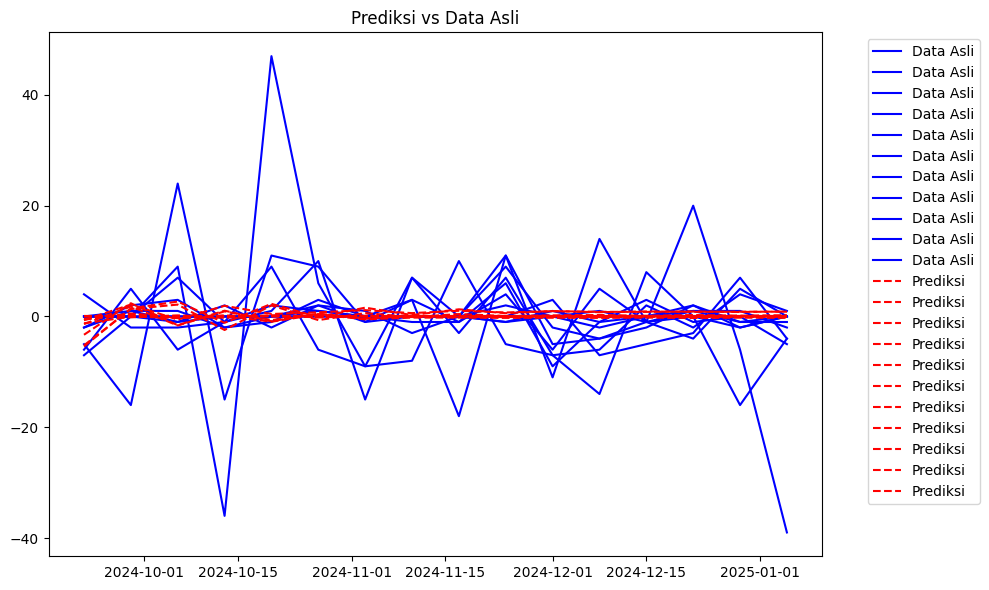

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Data Asli', color='blue')
plt.plot(forecast_df.index, forecast_df, label='Prediksi', color='red', linestyle='--')
plt.title('Prediksi vs Data Asli')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

### **16. Forecast**

In [104]:
print(df_weekly.index)
print(type(df_weekly.index[0]))


DatetimeIndex(['2024-01-07', '2024-01-14', '2024-01-21', '2024-01-28',
               '2024-02-04', '2024-02-11', '2024-02-18', '2024-02-25',
               '2024-03-03', '2024-03-10', '2024-03-17', '2024-03-24',
               '2024-03-31', '2024-04-07', '2024-04-14', '2024-04-21',
               '2024-04-28', '2024-05-05', '2024-05-12', '2024-05-19',
               '2024-05-26', '2024-06-02', '2024-06-09', '2024-06-16',
               '2024-06-23', '2024-06-30', '2024-07-07', '2024-07-14',
               '2024-07-21', '2024-07-28', '2024-08-04', '2024-08-11',
               '2024-08-18', '2024-08-25', '2024-09-01', '2024-09-08',
               '2024-09-15', '2024-09-22', '2024-09-29', '2024-10-06',
               '2024-10-13', '2024-10-20', '2024-10-27', '2024-11-03',
               '2024-11-10', '2024-11-17', '2024-11-24', '2024-12-01',
               '2024-12-08', '2024-12-15', '2024-12-22', '2024-12-29',
               '2025-01-05'],
              dtype='datetime64[ns]', name='TAN

In [109]:
last_date

Timestamp('1970-01-01 00:00:00.000000002')

In [110]:
df.index

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002'],
              dtype='datetime64[ns]', freq=None)

In [122]:
# Langkah 1: Forecast ke depan berdasarkan model VAR yang sudah dilatih
selected_lag = optimal_lag  # Ganti sesuai dengan lag VAR yang kamu pakai
n_forecast = 4   # Ganti jumlah minggu yang ingin kamu forecast ke depan

# Ambil data terakhir dari train_data untuk input ke forecasting
last_train_values = train_data.values[-selected_lag:]
forecast_diff = var_model.forecast(y=last_train_values, steps=n_forecast)

# Langkah 2: Forecast dan buat index tanggal ke depan
df_weekly.index = pd.to_datetime(df_weekly.index)
last_date = df_weekly.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=n_forecast, freq='W')

# Buat dataframe forecast dengan index yang benar
forecast_diff_df = pd.DataFrame(forecast_diff, columns=df_diff.columns, index=forecast_index)

# Langkah 3: Inverse differencing untuk mengembalikan ke nilai asli
# Ambil baris terakhir dari data asli sebelum differencing
last_actual = df_weekly.iloc[-1]  # Ini penting untuk starting point inverse

# Invers dengan penjumlahan kumulatif + last actual
forecast_original_df = forecast_diff_df.cumsum() + last_actual
forecast_original_df = forecast_original_df.fillna(0).round().astype(int)  
forecast_original_df


,BISKUAT BOLU CKL 16GR,CLOUD 9 CHOCO 15 4G,CLOUD 9 VANILA 15 4G,FRESHCARE ORIGINAL 10ML,GATSBY SPL/C DO 175ML,GATSBY SPL/C GS 175ML,GREENFIELDS COKLAT 105ML,GREENFIELDS STRAW 105ML,INDOMILK KID CKL 115ML,INDOMILK KID VNL 115ML,SAKINAH 1500ML
2025-01-12,-1,4,3,0,-1,0,0,0,16,1,10
2025-01-19,0,4,5,0,0,0,0,0,17,2,12
2025-01-26,-1,4,4,0,0,0,0,0,20,4,12
2025-02-02,0,4,5,0,0,0,0,0,19,2,14


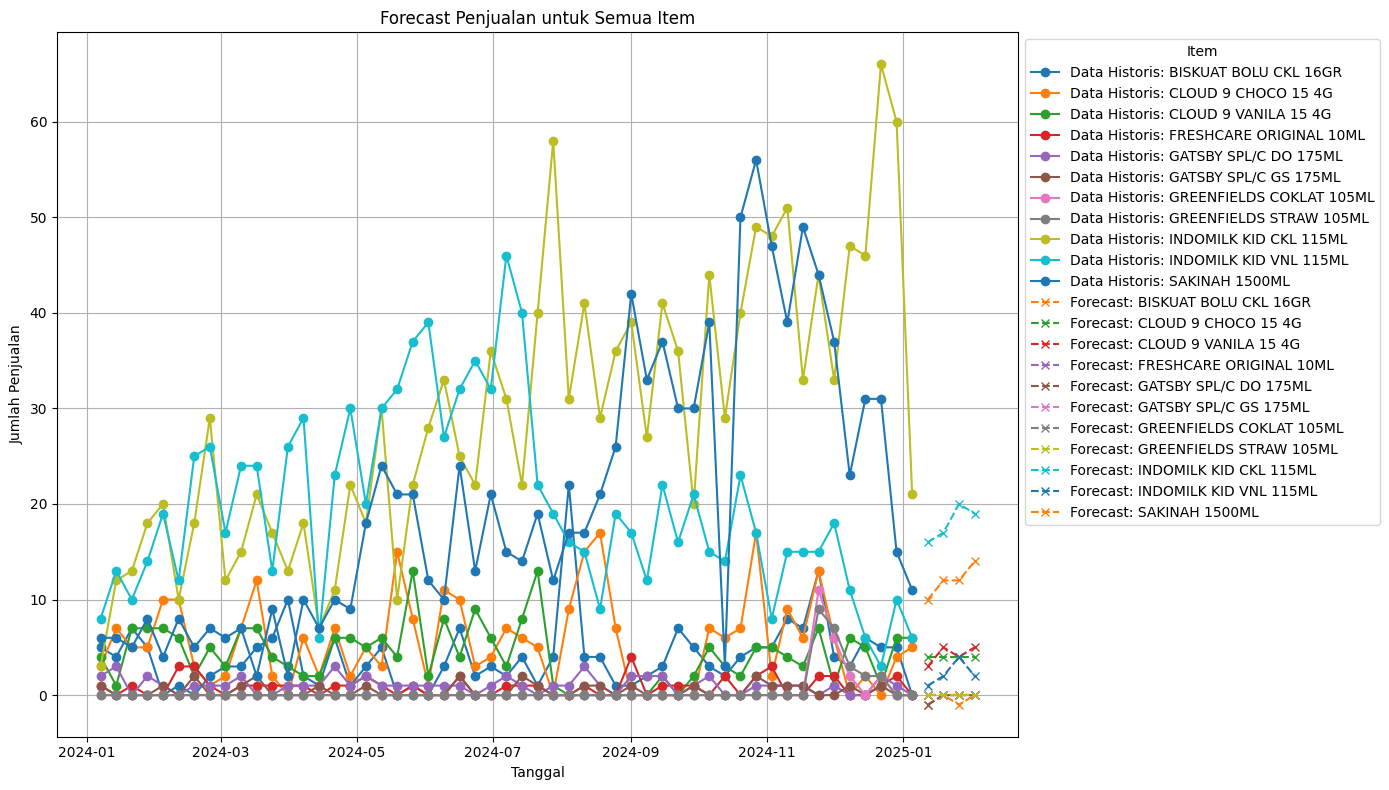

In [124]:
# Langkah 5: Visualisasi hasil forecast untuk tiap item dalam satu grafik
plt.figure(figsize=(14, 8))  # Ukuran grafik yang lebih besar untuk banyak garis

# Plot data historis untuk setiap item
for col in df_weekly.columns:
    plt.plot(df_weekly.index, df_weekly[col], label=f'Data Historis: {col}', marker='o')

# Plot hasil forecast untuk setiap item
for col in df_weekly.columns:
    plt.plot(forecast_original_df.index, forecast_original_df[col], label=f'Forecast: {col}', linestyle='--', marker='x')

# Menambahkan judul dan label
plt.title('Forecast Penjualan untuk Semua Item')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')

# Menambahkan legend untuk setiap item
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Item')

# Menambahkan grid
plt.grid(True)

# Mengatur layout agar lebih rapi
plt.tight_layout()

# Menampilkan grafik
plt.show()


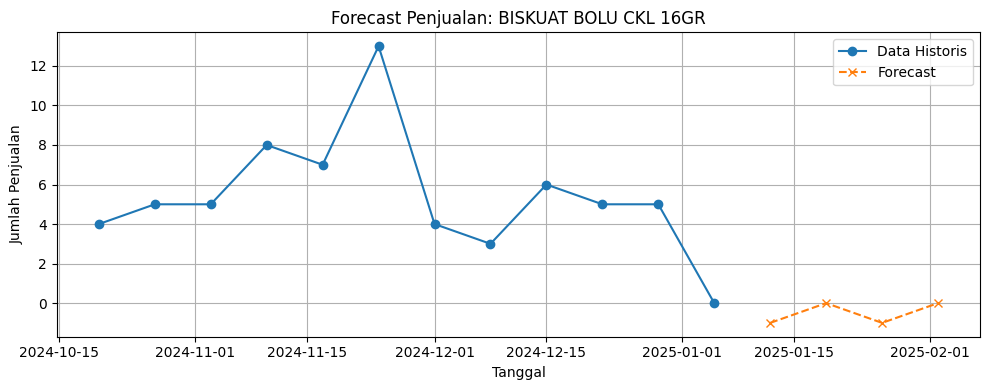

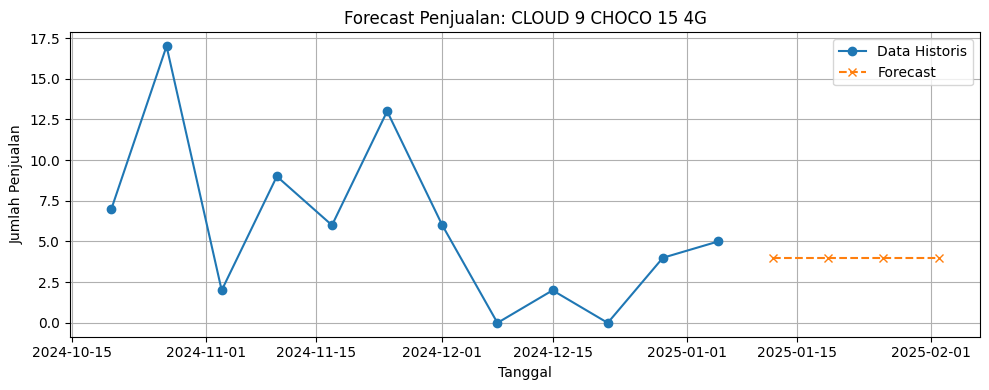

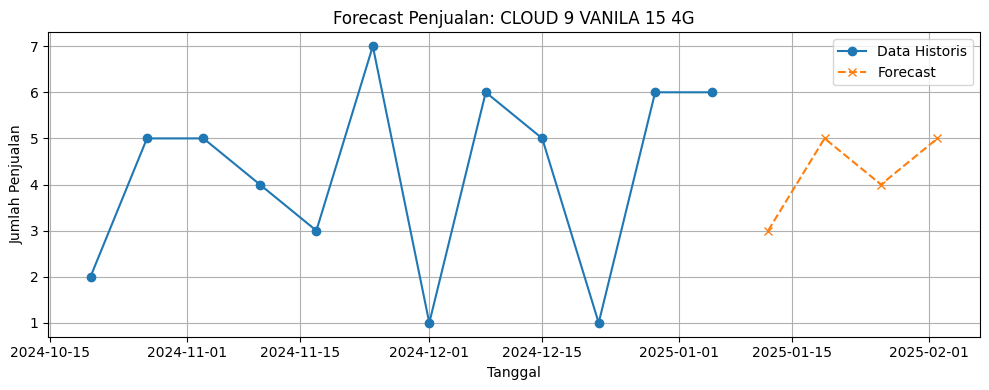

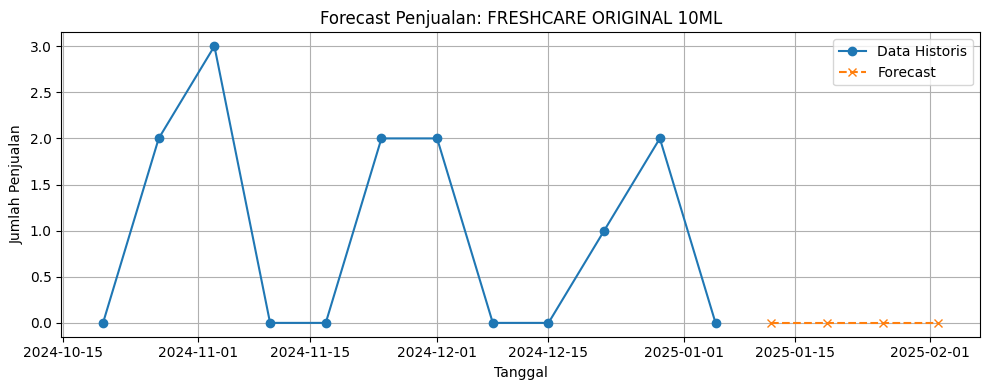

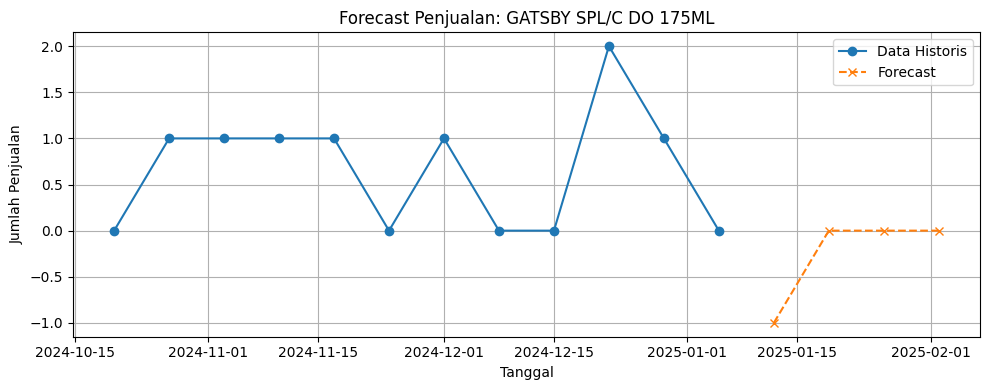

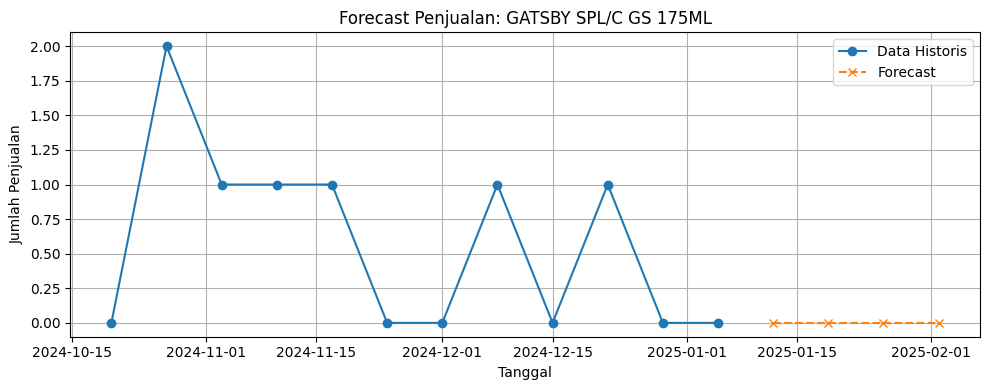

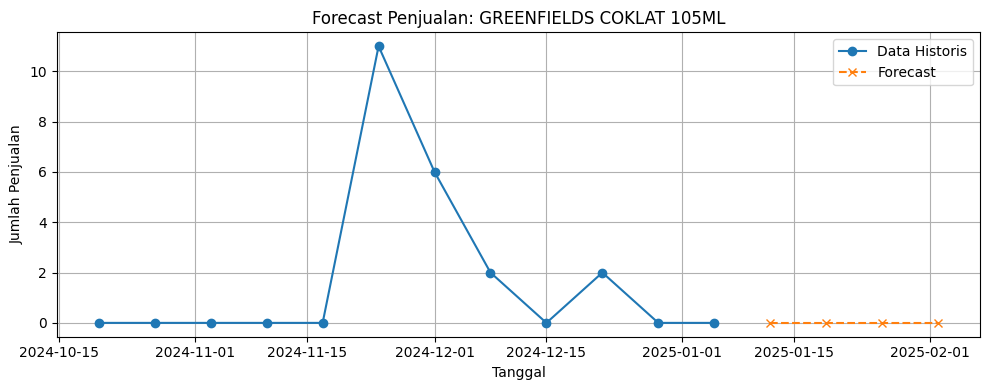

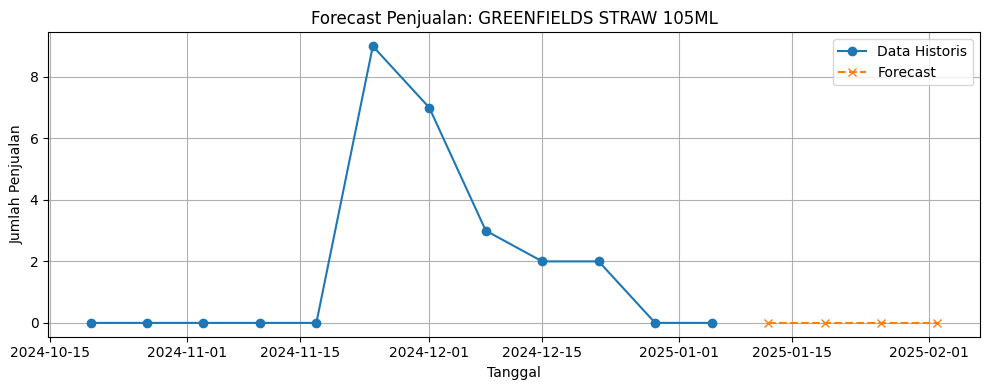

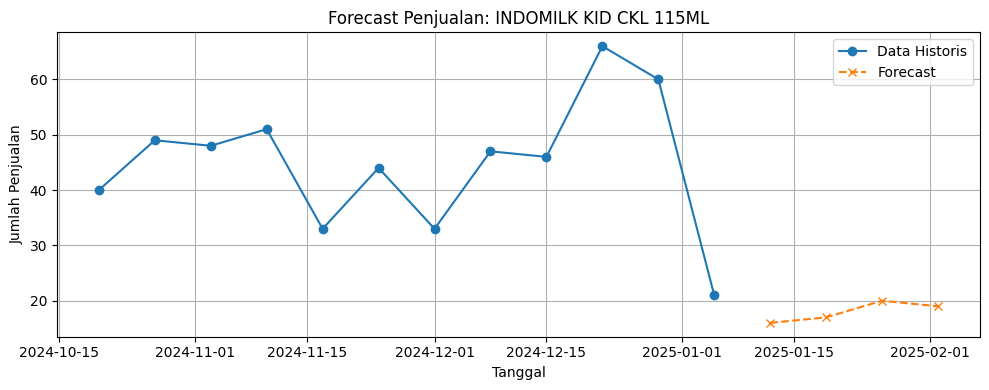

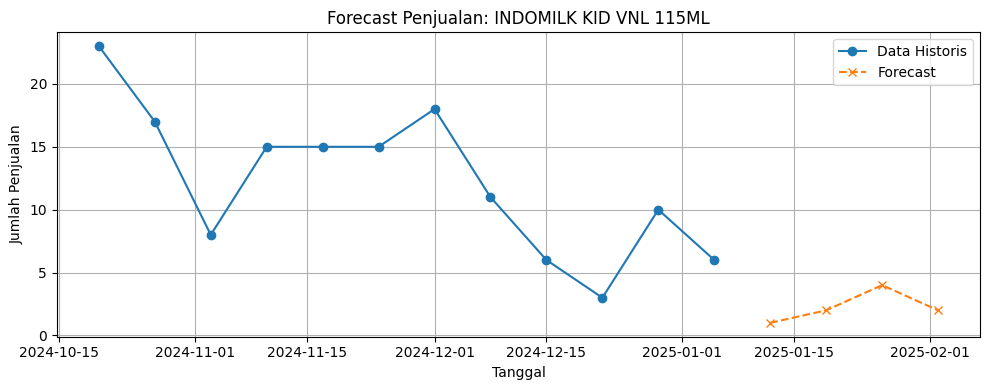

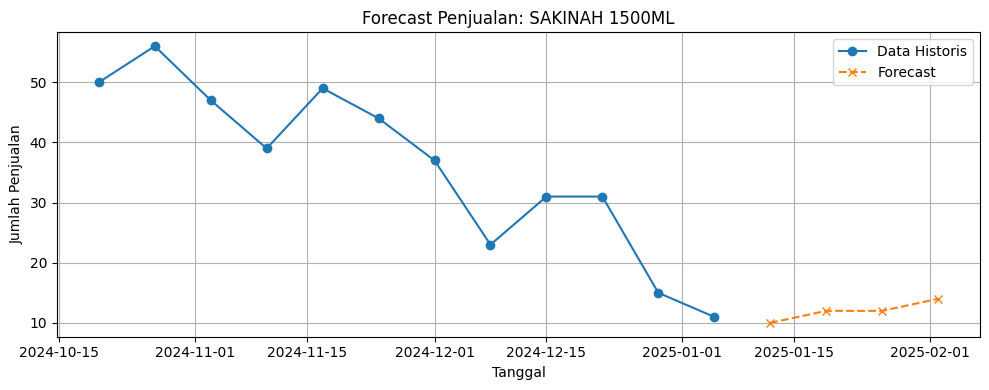

In [123]:
# Langkah 5: Visualisasi hasil forecast untuk tiap item
for col in df_weekly.columns:
    plt.figure(figsize=(10, 4))
    
    # Plot data historis (data asli)
    plt.plot(df_weekly[col].iloc[-12:], label='Data Historis', marker='o')  # Tampilkan 12 minggu terakhir
    
    # Plot hasil forecast (nilai asli hasil inverse differencing)
    plt.plot(forecast_original_df[col], label='Forecast', linestyle='--', marker='x')
    
    plt.title(f'Forecast Penjualan: {col}')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Penjualan')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()